# CIS 380 FALL 2021 TERM PROJECT
## Name: James Mozina
## Date: 11/11/21


# Project Descriptions
This purpose of this project is to find out how these three major assignments would impact on student's weight total (performance); did it make any difference in terms of performance between CIS and NON-CIS students? How about gender?



# Data Prep
Refer to chapter 6 - Data Prep

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Step 1, read data file to create a dataframe named sd 

In [4]:
import pandas as pd
sd = pd.read_csv('data/sd.csv')

## Inspect the dataset;Look for any duplicates, null values, data type, column name

In [5]:
sd.head() 
sd.tail()
sd.shape
sd.dtypes
sd.columns
sd.info()
sd

,ID,Gender,CIS,REQ,DFD,ERD,Weighted
0,1,M,N,90.0,85.0,80.0,77.56%
1,2,M,Y,90.0,100.0,90.0,81.85%
2,3,M,Y,90.0,100.0,90.0,84.59%
3,4,F,Y,90.0,50.0,85.0,81.30%
4,5,F,Y,40.0,75.0,90.0,72.52%


,ID,Gender,CIS,REQ,DFD,ERD,Weighted
95,96,M,Y,80.0,NaN,50.0,75.98%
96,97,M,Y,67.0,70.0,50.0,66.49%
97,98,M,Y,33.0,30.0,90.0,62.88%
98,99,M,Y,33.0,70.0,50.0,46.17%
99,100,M,N,73.0,NaN,90.0,58.71%


(100, 7)

ID            int64
Gender       object
CIS          object
REQ         float64
DFD         float64
ERD         float64
Weighted     object
dtype: object

Index(['ID', 'Gender', 'CIS', 'REQ', 'DFD', 'ERD', 'Weighted'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        100 non-null    int64  
 1   Gender    100 non-null    object 
 2   CIS       100 non-null    object 
 3   REQ       94 non-null     float64
 4   DFD       95 non-null     float64
 5   ERD       89 non-null     float64
 6   Weighted  100 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ KB


,ID,Gender,CIS,REQ,DFD,ERD,Weighted
0,1,M,N,90.0,85.0,80.0,77.56%
1,2,M,Y,90.0,100.0,90.0,81.85%
2,3,M,Y,90.0,100.0,90.0,84.59%
3,4,F,Y,90.0,50.0,85.0,81.30%
4,5,F,Y,40.0,75.0,90.0,72.52%
...,...,...,...,...,...,...,...
95,96,M,Y,80.0,NaN,50.0,75.98%
96,97,M,Y,67.0,70.0,50.0,66.49%
97,98,M,Y,33.0,30.0,90.0,62.88%
98,99,M,Y,33.0,70.0,50.0,46.17%


## step 2 : verify columns, modify from upper to lower case and abbreviated

In [6]:

sd.columns = ['id','gender','cis','req','dfd','erd','wght']


# step 2.1 : change data type, look at the wght column (percent to float?)

In [7]:
# convert string(object) to category; gender and cis.

sd.dtypes
sd.gender= sd.gender.astype('category')
sd.cis = sd.cis.astype('category')

id          int64
gender     object
cis        object
req       float64
dfd       float64
erd       float64
wght       object
dtype: object

# wght column; percent to float

In [8]:
# strip the percentage symbol and convert to float value
sd.wght=sd.wght.str.strip('%')


In [9]:
sd.wght=sd.wght.astype('float')


In [10]:
sd
sd.dtypes

,id,gender,cis,req,dfd,erd,wght
0,1,M,N,90.0,85.0,80.0,77.56
1,2,M,Y,90.0,100.0,90.0,81.85
2,3,M,Y,90.0,100.0,90.0,84.59
3,4,F,Y,90.0,50.0,85.0,81.30
4,5,F,Y,40.0,75.0,90.0,72.52
...,...,...,...,...,...,...,...
95,96,M,Y,80.0,NaN,50.0,75.98
96,97,M,Y,67.0,70.0,50.0,66.49
97,98,M,Y,33.0,30.0,90.0,62.88
98,99,M,Y,33.0,70.0,50.0,46.17


id           int64
gender    category
cis       category
req        float64
dfd        float64
erd        float64
wght       float64
dtype: object

# Step 3: drop duplicates and check with sum

In [11]:
sd.drop_duplicates(inplace=True)
sd.shape
sd.duplicated().sum()
# no dpulicates

(100, 7)

0

# Step 4: handle null values, check with sum()

In [12]:
#first i'm showing all null values each row per column. Lastly, summing null values per column.
sd[sd.req.isnull()] 
sd[sd.dfd.isnull()]
sd[sd.erd.isnull()]
sd.isnull().sum()

,id,gender,cis,req,dfd,erd,wght
35,36,M,N,NaN,NaN,NaN,35.29
37,38,M,N,NaN,40.0,50.0,61.44
41,42,F,N,NaN,20.0,NaN,51.27
43,44,M,N,NaN,60.0,50.0,56.39
93,94,M,Y,NaN,50.0,NaN,61.39
94,95,M,N,NaN,60.0,NaN,44.50


,id,gender,cis,req,dfd,erd,wght
17,18,F,N,50.0,NaN,75.0,48.56
35,36,M,N,NaN,NaN,NaN,35.29
85,86,M,Y,85.0,NaN,50.0,51.23
95,96,M,Y,80.0,NaN,50.0,75.98
99,100,M,N,73.0,NaN,90.0,58.71


,id,gender,cis,req,dfd,erd,wght
35,36,M,N,NaN,NaN,NaN,35.29
40,41,M,N,100.0,50.0,NaN,75.68
41,42,F,N,NaN,20.0,NaN,51.27
45,46,F,Y,70.0,30.0,NaN,70.78
53,54,M,N,80.0,60.0,NaN,73.10
72,73,M,N,100.0,100.0,NaN,79.09
73,74,M,Y,90.0,100.0,NaN,81.20
79,80,F,Y,60.0,40.0,NaN,54.14
91,92,F,N,80.0,40.0,NaN,64.20
93,94,M,Y,NaN,50.0,NaN,61.39


id         0
gender     0
cis        0
req        6
dfd        5
erd       11
wght       0
dtype: int64

In [13]:
sd.dropna(how='any', inplace=True) #replacing all null values with 0... Prof. suggested on email.
sd.isnull().sum()
sd.shape

id        0
gender    0
cis       0
req       0
dfd       0
erd       0
wght      0
dtype: int64

(83, 7)

# fill with 0 or drop? *******************************************************
sd.req.fillna(value=0, inplace=True)
sd.dfd.fillna(value=0, inplace=True)
sd.erd.fillna(value=0, inplace=True)

sd[sd.req.isnull()]
sd[sd.dfd.isnull()]
sd[sd.erd.isnull()]

sd.shape

## This past coouple markdowns where I spent some time thinking what would be the best option for my data not to be vague, or short. One thing I thought it could work is to replace null values with the average of their column. Or replace null value with the average of their current score. Between two assignments. If more than 2 null values or null on wght, drop.

# Step 5: handle outliers, do a boxplot to see any outliers in the data set

<AxesSubplot:>

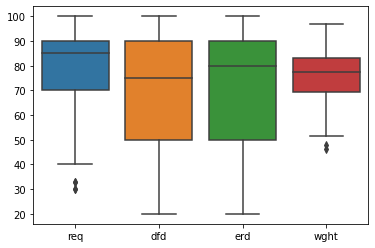

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns
columns = ['req','dfd','erd','wght']
sns.boxplot(data=sd[columns])

#we need to work on the req and wght variable

# Step 5.2 : Drop outliers using percentile


#three sigmas approach
upper_limit =sd['req'].mean() + 3 * sd['req'].std()
lower_limit = sd['req'].mean() - 3 * sd['req'].std()

print(upper_limit)
print(lower_limit)
sd = sd[(sd ['req'] < upper_limit) & (sd['req'] > lower_limit)]

In [15]:
#percentile approach 
percentile25 = sd['req'].quantile(0.25)
percentile75 = sd['req'].quantile(0.75)
iqr = percentile75 - percentile25
iqr

20.0

In [16]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
sd = sd[(sd['req'] < upper_limit)& (sd['req'] > lower_limit)]
sd.shape

(75, 7)

In [17]:
percentile25w = sd['wght'].quantile(0.25)
percentile75w = sd['wght'].quantile(0.75)
iqrw = percentile75w - percentile25w
iqrw
sd.shape

13.079999999999998

(75, 7)

In [18]:
upper_limitw = percentile75w + 1.5 * iqrw
lower_limitw = percentile25w - 1.5 * iqrw
sd = sd[(sd['wght'] < upper_limitw)& (sd['wght'] > lower_limitw)]
sd.shape

(74, 7)

# Step 5.3: re-run the boxplot to double check outliers

<AxesSubplot:>

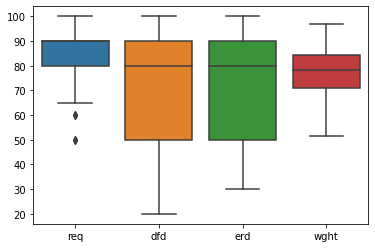

In [19]:
#no outliers, no duplicates, and no null values
sns.boxplot(data=sd[columns])


# Step6 :create a copy of the cleaned dataframe, save the cleaned dataframe to a sd_cleaned.csv

In [20]:
# Check everything

sd.head()
sd.dtypes
sd.info()


,id,gender,cis,req,dfd,erd,wght
0,1,M,N,90.0,85.0,80.0,77.56
1,2,M,Y,90.0,100.0,90.0,81.85
2,3,M,Y,90.0,100.0,90.0,84.59
3,4,F,Y,90.0,50.0,85.0,81.30
6,7,F,N,90.0,80.0,80.0,78.43


id           int64
gender    category
cis       category
req        float64
dfd        float64
erd        float64
wght       float64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 96
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      74 non-null     int64   
 1   gender  74 non-null     category
 2   cis     74 non-null     category
 3   req     74 non-null     float64 
 4   dfd     74 non-null     float64 
 5   erd     74 non-null     float64 
 6   wght    74 non-null     float64 
dtypes: category(2), float64(4), int64(1)
memory usage: 3.8 KB


                                ## Exploratory Data Analysis




# Group by gender and cis showing the mean/stdv for each assignment

In [21]:
#mean for three assignments

sd[['req','dfd','erd']].mean()

# mean by grouping gender and cis students
sd.groupby(['gender','cis'])[['req','dfd','erd']].mean()


#stdv for three assignments
sd[['req','dfd','erd']].std()


#stdv by grouping gender and cis students
sd.groupby(['gender','cis'])[['req','dfd','erd']].std()

#min, max, sum in groups
sd.groupby(['gender','cis'])['wght'].agg([min,max,sum])

req    83.675676
dfd    70.675676
erd    71.756757
dtype: float64

req        dfd        erd
gender cis                                 
F      N    81.562500  65.625000  68.750000
       Y    84.642857  68.928571  76.428571
M      N    80.833333  65.000000  61.250000
       Y    85.375000  76.093750  75.156250

req    12.791380
dfd    25.806502
erd    19.835495
dtype: float64

req        dfd        erd
gender cis                                 
F      N    13.870683  24.554361  20.776589
       Y    13.652879  27.608428  17.145146
M      N     9.003366  28.524312  23.464189
       Y    13.282902  24.715620  18.160768

min    max      sum
gender cis                       
F      N    64.17  86.56  1221.59
       Y    67.10  96.14  1144.25
M      N    51.48  79.70   847.17
       Y    60.30  96.95  2576.61

# Observation #1: 


The standard deviaton for all groups has a wider spread from all 3 assignments. The dfd data will be more distributed.


Many students seem they did well in the first assignment, req, can we confirm this later?

# Count, visualize cis and non cis students completed their assingment by gender

M    44
F    30
Name: gender, dtype: int64

Y    46
N    28
Name: cis, dtype: int64

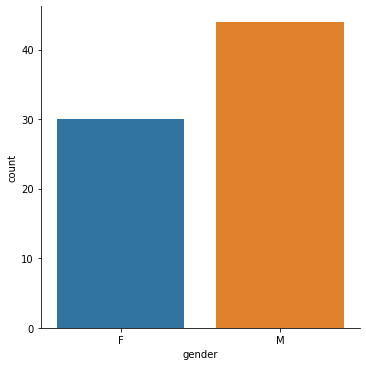

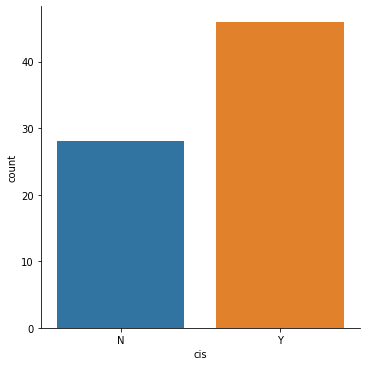

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x='gender', data=sd, kind='count')
sd['gender'].value_counts(sort=True)

sns.catplot(x='cis', data=sd, kind='count')
sd['cis'].value_counts(sort=True)


plt.show()




In [23]:
# delete the id column, not sure if this should be done......
sd = sd.loc[:,'gender':'wght']
sd.head()


sd.info()

,gender,cis,req,dfd,erd,wght
0,M,N,90.0,85.0,80.0,77.56
1,M,Y,90.0,100.0,90.0,81.85
2,M,Y,90.0,100.0,90.0,84.59
3,F,Y,90.0,50.0,85.0,81.30
6,F,N,90.0,80.0,80.0,78.43


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 96
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  74 non-null     category
 1   cis     74 non-null     category
 2   req     74 non-null     float64 
 3   dfd     74 non-null     float64 
 4   erd     74 non-null     float64 
 5   wght    74 non-null     float64 
dtypes: category(2), float64(4)
memory usage: 5.7 KB


# Save new and clean dataset

In [24]:
import pandas as pd #saved cleaned data
sd.to_csv('data/sd_cleaned.csv')

In [25]:
sd.keys()
sd.dtypes
sd.shape

Index(['gender', 'cis', 'req', 'dfd', 'erd', 'wght'], dtype='object')

gender    category
cis       category
req        float64
dfd        float64
erd        float64
wght       float64
dtype: object

(74, 6)

# Graph the counts in groups by weight

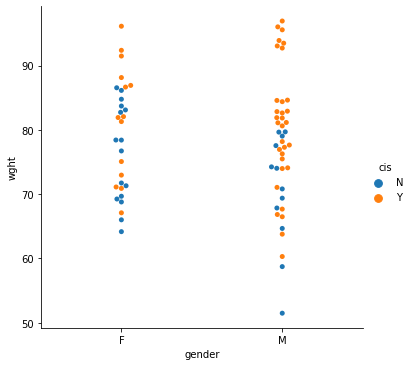

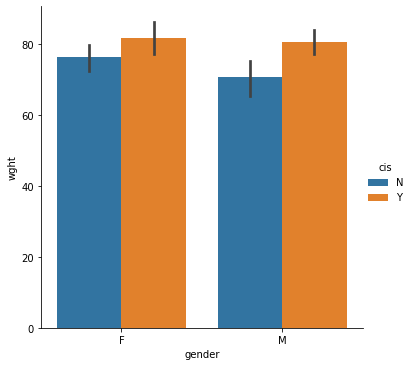

In [26]:

sns.catplot(x="gender", y="wght", hue="cis", kind="swarm", data=sd)

sns.catplot(x="gender", y="wght", hue='cis',kind="bar", data=sd)

plt.show()




# Observation#2:

Even though more male students are in the class, CIS Female students have bigger weight grades than males. However, we can see the cluster around 76%-85% performance for CIS male students. 



NON-CIS female students also show higher grades than non-cis male students.

# Lets plot a bell shape graph and see how everything is distributed. We will see the skewness and kurtosis for the assignments

<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'All three assignments')

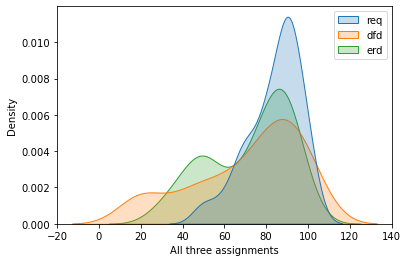


 ---Assignments and Total Performance mean--- 
 req     83.675676
dfd     70.675676
erd     71.756757
wght    78.238108
dtype: float64

 ---Assignments and Total Performance median--- 
 req     90.000
dfd     80.000
erd     80.000
wght    78.425
dtype: float64

 --- Assignments and Total Performance standard deviaton --- 
 req     12.791380
dfd     25.806502
erd     19.835495
wght     9.692136
dtype: float64

 --- Assignment skewness --- 
 req    -0.897765
dfd    -0.772765
erd    -0.584550
wght   -0.115530
dtype: float64

 --- Assignment kurtosis --- 
 req     0.277153
dfd    -0.573110
erd    -0.966338
wght   -0.172170
dtype: float64


<AxesSubplot:ylabel='Density'>

Text(0.5, 0, 'All three assignments Vs the total weight of their grades')

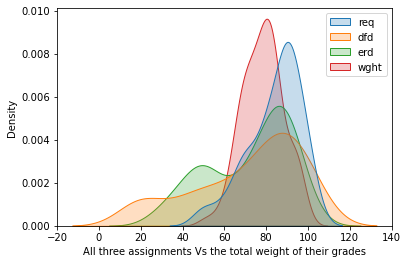

In [27]:


columns=['req','dfd','erd']
sns.kdeplot(data=sd[columns], shade=True)
plt.xlabel('All three assignments')
plt.show()


print('\n ---Assignments and Total Performance mean--- \n',sd[['req','dfd','erd','wght']].mean())
      
print('\n ---Assignments and Total Performance median--- \n',sd[['req','dfd','erd','wght']].median())


    
print('\n --- Assignments and Total Performance standard deviaton --- \n', sd[['req','dfd','erd','wght']].std())


      
print('\n --- Assignment skewness --- \n', sd.loc[:,'req' : 'wght'].skew())
print('\n --- Assignment kurtosis --- \n', sd.loc[:, 'req' : 'wght'].kurt())


sns.kdeplot(data=sd.loc[:, 'req':'wght'], shade=True)
plt.xlabel('All three assignments Vs the total weight of their grades')
plt.show()



# Observation # 3:

This confirmed our previous observation regarding stdv. The assignment 'dfd' spreads out wider than others, the distributtion is bigger than others. Seems that students found the 2nd assignment more difficult than the other two. Not normal, asymmetrical distributed.

While 'erd' was also another assignment most students found it difficult, some of them did good. We can see it has a distribution of grades ranges from  10 to 120. A little narrower than 'dfd', still hard to compare data because it is not normally distributed.

The first assignment 'req', most of them did better than the average . Showing a higher mean and a smaller stdv. We can assume as the course continues, the assignments get harder and students struggle in their grades.

The (weight) the total performance and tells us the total performance of the class is somewhat normally distributed with a narrow bell shape. Small standard deviation and high mean.

# Additional comments:
The kurtosis for our wght variables, is less than -1. This means it is not normally distributed. Moderaly skewed to the left.


req: mean < median and low standard deviation 

dfd: mean < median and very high stdv

erd: mean < median and somewhat hight stdv

wght: mean and median almost equal with a difference of 0.99....



<AxesSubplot:xlabel='req', ylabel='Count'>

<AxesSubplot:xlabel='dfd', ylabel='Count'>

<AxesSubplot:xlabel='erd', ylabel='Count'>

<AxesSubplot:xlabel='wght', ylabel='Count'>

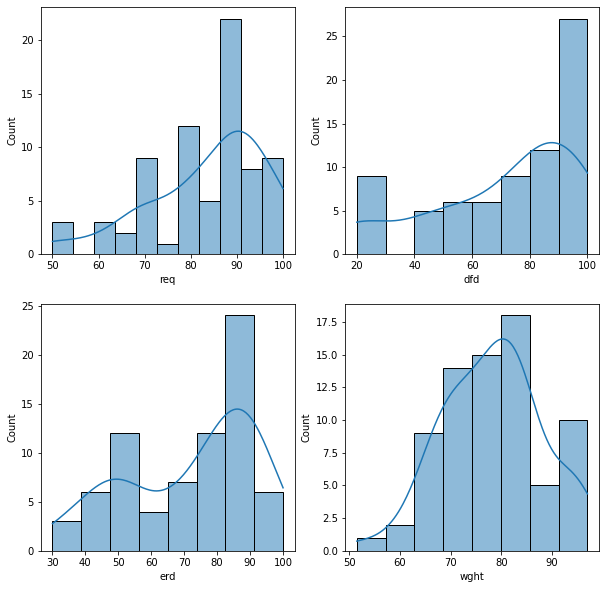

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots (2,2, figsize = (10, 10))

sns.histplot(data=sd.req, kde=True, ax = axs[0,0])
sns.histplot(data=sd.dfd, kde=True, ax = axs[0,1])
sns.histplot(data=sd.erd, kde=True, ax = axs[1,0])
sns.histplot(data=sd.wght, kde=True, ax = axs[1,1])

# Working with categorical variables

<AxesSubplot:xlabel='gender', ylabel='count'>

Text(0.5, 1.0, 'Gender Count')

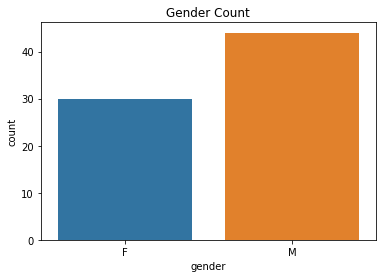

In [29]:
# We enough samples to work with this amount. 

sns.countplot(x='gender', data = sd)
plt.title('Gender Count')

In [30]:
#Create a column with percentage of gender in the class


genderC = sd.gender.value_counts()
type(genderC) #this is a series, you have convert it to data frame.

genderdf = pd.DataFrame(genderC)
genderdf.columns = ['gndrct']
genderdf

#add a column 'percentage' to the dataframe

genderdf['percentage'] = genderdf/genderC.sum()
genderdf






#maybe join this new column later?

pandas.core.series.Series

,gndrct
M,44
F,30


,gndrct,percentage
M,44,0.594595
F,30,0.405405


# Note: we cannot do crosstabs/contigency (in this case) with numerical variables. In order to analyze numerical values in the contigency table, we need to add a new column to classify the numerical values to represent them into a categorical value. Depending on the what suits the dataset.

In [31]:
import numpy as np

#sd['status']=np.where(sd.wght >= 76, 'outstanding', 'poor')
#sd

# or we can do it with a for loop:
sd['status'] = ['outstanding' if x >= 76 else 'poor' for x in sd['wght']]
sd

,gender,cis,req,dfd,erd,wght,status
0,M,N,90.0,85.0,80.0,77.56,outstanding
1,M,Y,90.0,100.0,90.0,81.85,outstanding
2,M,Y,90.0,100.0,90.0,84.59,outstanding
3,F,Y,90.0,50.0,85.0,81.30,outstanding
6,F,N,90.0,80.0,80.0,78.43,outstanding
...,...,...,...,...,...,...,...
87,M,Y,85.0,70.0,50.0,66.84,poor
89,F,Y,80.0,40.0,50.0,67.10,poor
90,M,Y,95.0,100.0,80.0,93.50,outstanding
92,F,N,95.0,40.0,80.0,71.74,poor



 --- Sum from two categories by class status --- 



status      outstanding  poor  All
gender cis                        
F      N              9     7   16
       Y              9     5   14
M      N              4     8   12
       Y             23     9   32
All                  45    29   74


 --- Percentage from two categories by class status --- 



status      outstanding      poor       All
gender cis                                 
F      N       0.200000  0.241379  0.216216
       Y       0.200000  0.172414  0.189189
M      N       0.088889  0.275862  0.162162
       Y       0.511111  0.310345  0.432432


 --- Percentage by gender --- 



,gndrct,percentage
M,44,0.594595
F,30,0.405405


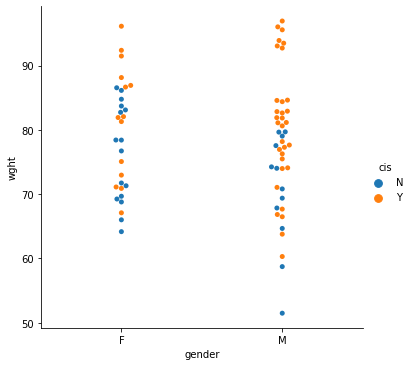

In [32]:
# now we can do a crosstab to see how many students are doing in the class

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('\n --- Sum from two categories by class status --- \n')
pd.crosstab([sd.gender, sd.cis], sd['status'], margins=True)

print('\n --- Percentage from two categories by class status --- \n')
pd.crosstab([sd.gender, sd.cis], sd['status'], margins=True, normalize='columns')

print('\n --- Percentage by gender --- \n')

genderdf

sns.catplot(x="gender", y="wght", hue="cis", kind="swarm", data=sd)








In [33]:
#Aggregate statistics by CIS students


print('\n --- CIS & NON-CIS Students Count / Mean / Standard Deviation --- \n')

agfunc=['count','mean','std'] #set up the functions as list
dict_str={'req':agfunc, 'dfd':agfunc, 'erd':agfunc} #create dictionary; columns with aggfunctions!!
sd.groupby('cis').agg(dict_str)




 --- CIS & NON-CIS Students Count / Mean / Standard Deviation --- 



req                         dfd                         erd             \
    count       mean        std count       mean        std count       mean   
cis                                                                            
N      28  81.250000  11.834116    28  65.357143  25.817327    28  65.535714   
Y      46  85.152174  13.248006    46  73.913043  25.536750    46  75.543478   

                
           std  
cis             
N    21.872496  
Y    17.676986

In [34]:
# by gender
print('\n --- Gender Student Count / Mean / Standard Deviation --- \n')

agfunc=['count','mean','std'] #set up the functions as list
dict_str={'req':agfunc, 'dfd':agfunc, 'erd':agfunc} #create dictionary; columns with aggfunctions!!
sd.groupby('gender').agg(dict_str)




 --- Gender Student Count / Mean / Standard Deviation --- 



req                         dfd                         erd  \
       count       mean        std count       mean        std count   
gender                                                                 
F         30  83.000000  13.620471    30  67.166667  25.619340    30   
M         44  84.136364  12.333714    44  73.068182  25.952011    44   

                              
             mean        std  
gender                        
F       72.333333  19.241359  
M       71.363636  20.441739

In [35]:
# Crosstab by cis and gender along with all the grades 

agfunc=['count','mean','std'] #set up the functions as list
dict_str={'req':agfunc, 'dfd':agfunc, 'erd':agfunc} #create dictionary; columns with aggfunctions!!
sd.groupby(['gender','cis']).agg(dict_str)

req                         dfd                         erd  \
           count       mean        std count       mean        std count   
gender cis                                                                 
F      N      16  81.562500  13.870683    16  65.625000  24.554361    16   
       Y      14  84.642857  13.652879    14  68.928571  27.608428    14   
M      N      12  80.833333   9.003366    12  65.000000  28.524312    12   
       Y      32  85.375000  13.282902    32  76.093750  24.715620    32   

                                  
                 mean        std  
gender cis                        
F      N    68.750000  20.776589  
       Y    76.428571  17.145146  
M      N    61.250000  23.464189  
       Y    75.156250  18.160768

# Observation 4: 

We can confirm the cluster outweights the number of CIS male students than female by more than half. We can also see almost a quarter of CIS male students have poor grade status in the class. 

However, a portion of (CIS & NON-CIS) females have better grades than males as seen in their weight for more than 85%.

In [36]:
#for gender only

agfunc=['count','mean','std'] #set up the functions as list
dict_str={'req':agfunc, 'dfd':agfunc, 'erd':agfunc} #create dictionary; columns with aggfunctions!!
sd.groupby('gender').agg(dict_str)


req                         dfd                         erd  \
       count       mean        std count       mean        std count   
gender                                                                 
F         30  83.000000  13.620471    30  67.166667  25.619340    30   
M         44  84.136364  12.333714    44  73.068182  25.952011    44   

                              
             mean        std  
gender                        
F       72.333333  19.241359  
M       71.363636  20.441739


 --- Pairplot for entire DataFrame --- 



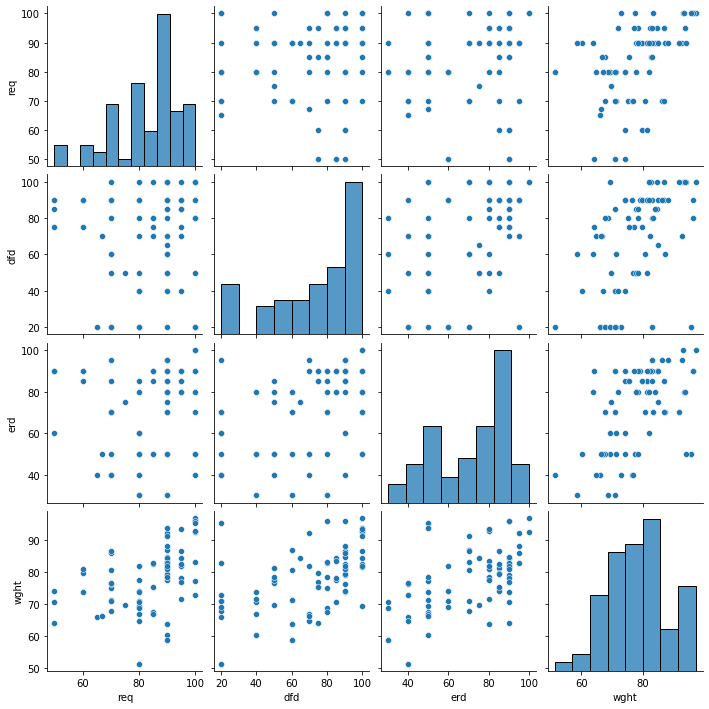

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('\n --- Pairplot for entire DataFrame --- \n')
sns.pairplot(sd)


 --- Pairplot for Gender --- 



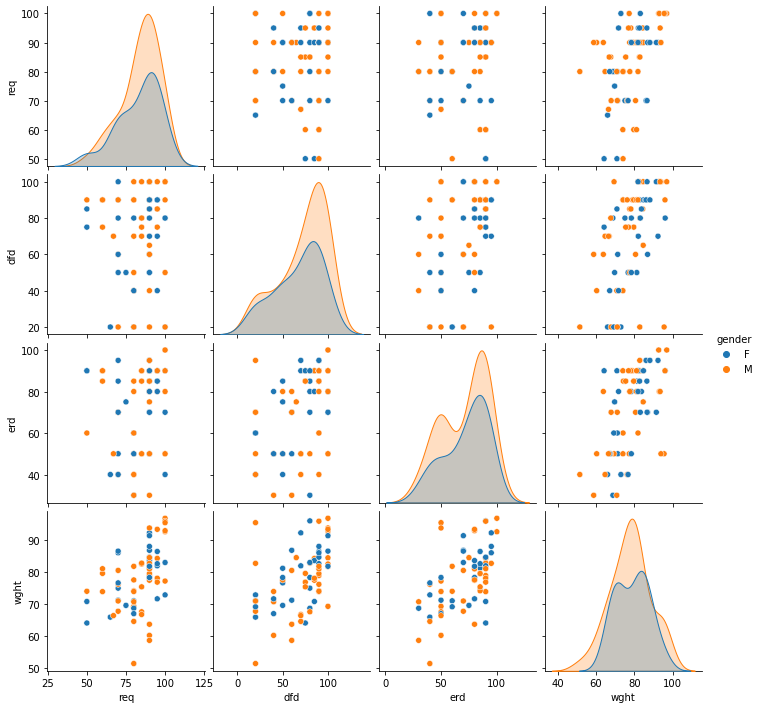

In [38]:
print('\n --- Pairplot for Gender --- \n')
sns.pairplot(data=sd, hue='gender')




 --- Pairplot for CIS/NON-CIS --- 



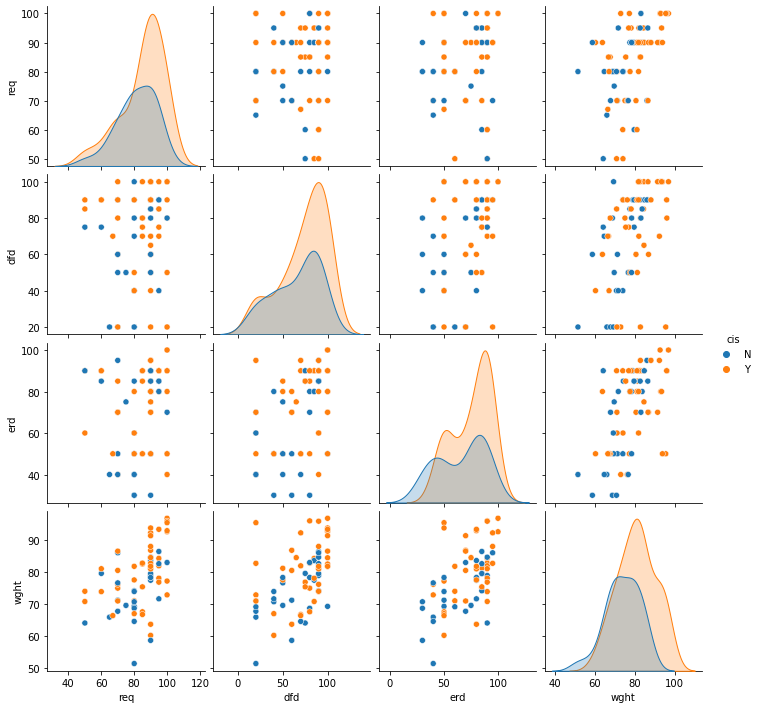

In [39]:
print('\n --- Pairplot for CIS/NON-CIS --- \n')
sns.pairplot(data=sd, hue='cis')

# Correlations - Heatmaps

<AxesSubplot:>

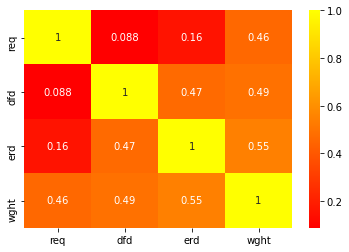

In [40]:
sns.heatmap(sd.corr(), annot=True, cmap='autumn')#entire dataframe in the heatmap


# Corr. Observations: 
All three assingments somewhat correlated together to the total performance (make sense).
Very weak relationship with req and dfd.


 --- Heatmap for Female Students --- 



<AxesSubplot:>

0.6061277713774522

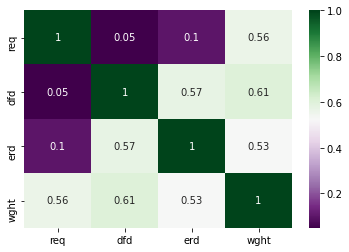

In [41]:
print('\n --- Heatmap for Female Students --- \n')

female=sd[sd['gender']== 'F']
sns.heatmap(female.corr(), annot=True, cmap='PRGn')

#Pearson Correlation

females=sd[sd['gender']=='F']
females['dfd'].corr(females['wght'])

# Corr. Observations:


Female students have a little more than average correlation between dfd assignment and the total performance.  

While the other two assignments a little less correlated. We have, again, weak relationship between req and dfd along with erd.


 --- Heatmap for Male Students --- 



<AxesSubplot:>

0.5576964527626181

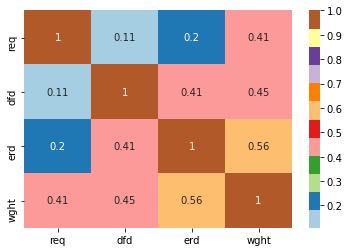

In [42]:
print('\n --- Heatmap for Male Students --- \n')


male=sd[sd['gender']== 'M']
sns.heatmap(male.corr(), annot=True, cmap='Paired')

#Pearson correlation
males=sd[sd['gender']=='M']
males['erd'].corr(males['wght'])

# Corr. Observations:
Male student show to be somewhat correlated in their effort with the erd assignment. Students study more?

Very weak relationship req and dfd assignment, again...

<AxesSubplot:>

-0.05763213008912129

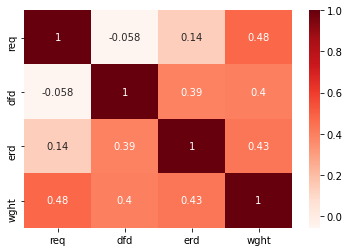

In [43]:
cis=sd[sd['cis']== 'Y']
sns.heatmap(cis.corr(), annot=True, cmap='Reds')


cisY=sd[sd['cis']=='Y']
cisY['req'].corr(cisY['dfd'])

# Corr Observations:

Between req and dfd, CIS students show a weak relationship in their assignments, negative correlation. Flat relationship. 

Mild correlation between erd and their weight performance.

<AxesSubplot:>

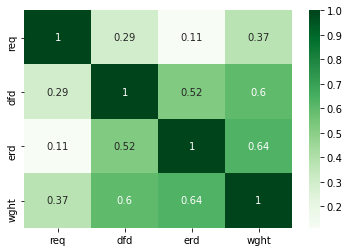

In [44]:
cisN=sd[sd['cis']=='N']
sns.heatmap(cisN.corr(), annot=True, cmap='Greens')


# Corr observations: 

Mild relationship with all assignments with NON cis students..

# Observation # 5:
The heatmap can tells that there is a pattern of weak relationship between req and dfd in all four correlations. 

While most of them illustrate that the last assignment correlates with the total performance. 

Overall all three assignments have an average correlation with male/female students and CIS/NON-CIS students.








In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
sd.dtypes
sd.describe()
sd.info()

#we need to change the data typr for new column 'status'
sd['status']=sd.status.astype('category')

sd.dtypes

gender    category
cis       category
req        float64
dfd        float64
erd        float64
wght       float64
status      object
dtype: object

,req,dfd,erd,wght
count,74.000000,74.000000,74.000000,74.000000
mean,83.675676,70.675676,71.756757,78.238108
std,12.791380,25.806502,19.835495,9.692136
min,50.000000,20.000000,30.000000,51.480000
25%,80.000000,50.000000,50.000000,71.075000
50%,90.000000,80.000000,80.000000,78.425000
75%,90.000000,90.000000,90.000000,84.230000
max,100.000000,100.000000,100.000000,96.950000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 96
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   gender  74 non-null     category
 1   cis     74 non-null     category
 2   req     74 non-null     float64 
 3   dfd     74 non-null     float64 
 4   erd     74 non-null     float64 
 5   wght    74 non-null     float64 
 6   status  74 non-null     object  
dtypes: category(2), float64(4), object(1)
memory usage: 6.3+ KB


gender    category
cis       category
req        float64
dfd        float64
erd        float64
wght       float64
status    category
dtype: object

                                # # Data Analysis
                                
                                
                                
                                
                                
                                
refer to chapter 8 and upcoming chapter 9 on multiple regression.
This part may not be complete since you will need the EDA to guide you.
In general, write down what you thoughts like with the columns of the sd dataframe,  what patterns would you expect to see? The set up some statistical analyses to test your "theories". 

# Chi-square test between gender and cis

# Hypothesis :
H0= gender is independent from majoring in cis

Ha = gender is NOT independent from majoring in cis

In [47]:
from scipy.stats import chi2_contingency


gender_cis=pd.crosstab(sd['gender'],sd['cis'], margins=True)
gender_cis


stat, p, dof, expected = chi2_contingency(gender_cis)

print('chi square is : %8.6f with %1dth degree of freedom and the p-value is %15.10f' % (stat,dof,p))

alpha = 0.05
print('p value is ' + str(p))
if p <= alpha:
    print('Dependent (Reject H0)')
else:
    print('Independent (H0 holds true)')
    


cis,N,Y,All
gender,,,
F,16,14,30
M,12,32,44
All,28,46,74


chi square is : 5.150612 with 4th degree of freedom and the p-value is    0.2721899454
p value is 0.2721899454252265
Independent (H0 holds true)


# Conclusion: gender and cis are independent, they are not mutually exclusive. We cannot reject null hypothesis. 

# HYPOTHESIS testing for CIS/NON-CIS students

H0 = CIS/NON-CIS students are independent of their course status.


Ha = CIS/NON-CIS students are NOT independent of their course status.

# Chi Square Test

In [48]:
# chi square test for CIS

sd_cstatus=pd.crosstab(sd['status'], sd['cis'], margins=True)
sd_cstatus



from scipy.stats import chi2_contingency

stat,p, dof, expected = chi2_contingency(sd_cstatus)

#stat is the chi square, p is the p-value, and dof is degree of freedom. Expected means the array of expected values
# for each cell of the table.

print('chi square is : %8.6f with %1dth degree of freedom and the p-value is %15.10f' % (stat,dof,p))


alpha = 0.05
print('p value is ' + str(p))
if p <= alpha:
    print('Dependent (Reject H0)')
else:
    print('Independent (H0 holds true)')
    





cis,N,Y,All
status,,,
outstanding,13,32,45
poor,15,14,29
All,28,46,74


chi square is : 3.909650 with 4th degree of freedom and the p-value is    0.4183714722
p value is 0.41837147217536463
Independent (H0 holds true)


# The conclusion refers to p-value is higher than alpha and less than chi square. Meaning student's major is independent from their grades. Does not affect their grade if the student is a CIS major or not.

# T-Test for CIS/NON-CIS

H0 : u1 = u2 (the sample mean of CIS students is equal to NON-CIS students)

Ha : u1 != u2 (the sample mean of CIS students is NOT equal to NON-CIS students)





Text(0.5, 1.0, 'CIS Students Weighted Performance')

Text(0.5, 1.0, 'NON-CIS Students Weighted Performance')

-0.09077601696360642

-0.5918581414040608

LeveneResult(statistic=0.23637031170888195, pvalue=0.6283165422935616)

Ttest_indResult(statistic=3.1999772613560227, pvalue=0.0020451071786437855)


 ------------------------ 

CIS major students performance is statistically better/bigger than the NON-CIS major students

 ------------------------ 

CIS major students mean:  80.88826086956522
NON-CIS major students mean:  73.88428571428571


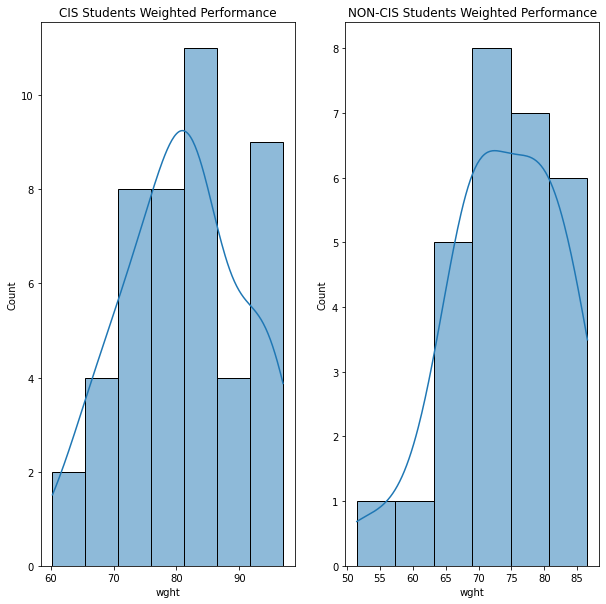

In [49]:
import scipy.stats as stats

#create a histogram
cissY= sd[sd['cis']=='Y']
cissN= sd[sd['cis']=='N']
fig, axs = plt.subplots(1,2, figsize =(10,10))
sns.histplot(data=cissY ['wght'], kde = True, ax = axs[0]).set_title('CIS Students Weighted Performance')
sns.histplot(data=cissN ['wght'], kde = True, ax = axs[1]).set_title('NON-CIS Students Weighted Performance')

#confirm with skewness
cissY['wght'].skew()
cissN['wght'].skew()



#null hypothesis for Levene: the variance are equal across all samples (alpha=0.05 < pvalue=0.78)
#     we cannot reject H0 hypothesis
# if this would have failed (alpha>pvalue) we have to run a Welch's t-test.
stats.levene(cissY['wght'], cissN['wght'])



# run independent test

stats.ttest_ind(cissY['wght'], cissN['wght'])

print('\n ------------------------ \n')



#More specific and comparing means

if (cissY['wght'].mean() ) > (cissN['wght'].mean() ):
    print('CIS major students performance is statistically better/bigger than the NON-CIS major students')
else:
    print('NON-CIS major students performance is better/bigger than CIS major students performance')
    
    

#CONFIRM by calculating their mean
print('\n ------------------------ \n')
print('CIS major students mean: ', cissY['wght'].mean())
print('NON-CIS major students mean: ', cissN['wght'].mean())

# Observation # 6: 

After creating histogram and running independent test, the skewness confirm that both distributions are somewhat normal. Skewness on both are stable and not beyond -1 or 1. As well as the p-value reflects that is higer than alpha and rejecting H0 hypothesis. Holding that the mean performance of CIS and NON-CIS sutdents ARE NOT THE SAME.


The results explain that CIS major students perform better than NON-CIS major students. The Chi-square results shows that students and grades and independent from each other, meaning, it does not matter if they are CIS or NON-CIS that affect could their grade.Furthermore, T-Test illustrated that their means are different and statistically reflected CIS students outperform NON-CIS students in their total weighted performance.


# Hypothesis testing for Gender

H0 = Male and Female students are independent of their course status.

Ha = Males and Female students are NOT independent of their course status.

# Chi-square test

In [50]:
sd_gstatus=pd.crosstab(sd['status'], sd['gender'], margins=True)
sd_gstatus



from scipy.stats import chi2_contingency

stat,p, dof, expected = chi2_contingency(sd_gstatus)

#stat is the chi square, p is the p-value, and dof is degree of freedom. Expected means the array of expected values
# for each cell of the table.

print('chi square is : %8.6f with %1dth degree of freedom and the p-value is %15.10f' % (stat,dof,p))


alpha = 0.05
print('p value is ' + str(p))
if p <= alpha:
    print('Dependent (Reject H0)')
else:
    print('Independent (H0 holds true)')
    



gender,F,M,All
status,,,
outstanding,18,27,45
poor,12,17,29
All,30,44,74


chi square is : 0.013918 with 4th degree of freedom and the p-value is    0.9999758965
p value is 0.999975896491498
Independent (H0 holds true)


Text(0.5, 1.0, 'Male students Weighted Performance')

Text(0.5, 1.0, 'Female stuents Weighted Performance')

Male Skew:  
 -0.1456292496262542
Female Skew: 
 0.06874807413251881
Levene test: 
 LeveneResult(statistic=0.15936100997086172, pvalue=0.6909271309563556)
Independent Test: 
 Ttest_indResult(statistic=-0.45425730977837103, pvalue=0.6510101269075385)

 ------------------------ 

Female students performance is better/bigger than male students performance

 ------------------------ 

Male students mean:  77.81318181818182
Female students mean:  78.86133333333333


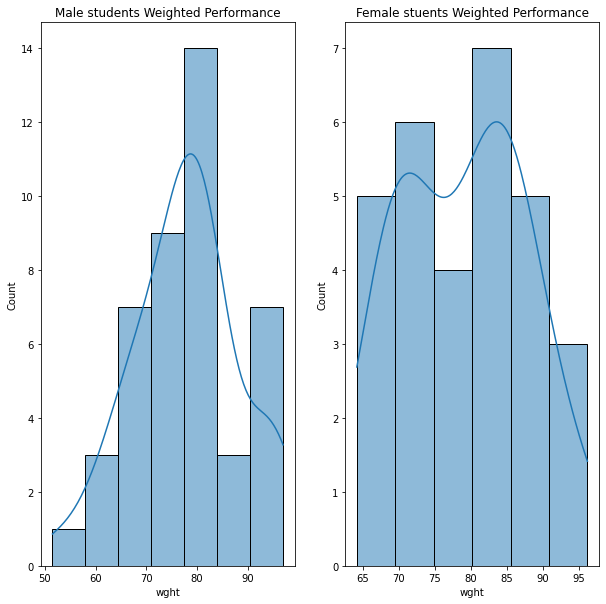

In [51]:
import scipy.stats as stats

#create a histogram
chim= sd[sd['gender']=='M']
chif= sd[sd['gender']=='F']
fig, axs = plt.subplots(1,2, figsize =(10,10))
sns.histplot(data=chim ['wght'], kde = True, ax = axs[0]).set_title('Male students Weighted Performance')
sns.histplot(data=chif ['wght'], kde = True, ax = axs[1]).set_title('Female stuents Weighted Performance')

#confirm with skewness
print('Male Skew:  \n', chim['wght'].skew())
print('Female Skew: \n', chif['wght'].skew())



#null hypothesis using Levene test: the variance are equal across all samples (alpha < pvalue)
#     we cannot reject H0 hypothesis
# if this would have failed (alpha>pvalue) we have to run a Welch's t-test.

print('Levene test: \n', stats.levene(chim['wght'], chif['wght']))



# run independent test

print('Independent Test: \n', stats.ttest_ind(chim['wght'], chif['wght']))

print('\n ------------------------ \n')



#More specific and comparing means

if (chim['wght'].mean() ) > (chif['wght'].mean() ):
    print('Male students performance is statistically better/bigger than female students')
else:
    print('Female students performance is better/bigger than male students performance')
    
    

#CONFIRM by calculating their mean
print('\n ------------------------ \n')
print('Male students mean: ', chim['wght'].mean())
print('Female students mean: ', chif['wght'].mean())

In [52]:
#if you want to rank or categorize with a need column from an old column, use dictionary and replace method
bins=[0,60,76,80,90,100]
labels = ['F','D','C','B','A']

sd['ranking'] = pd.cut(sd['wght'], bins, labels = labels)
sd


,gender,cis,req,dfd,erd,wght,status,ranking
0,M,N,90.0,85.0,80.0,77.56,outstanding,C
1,M,Y,90.0,100.0,90.0,81.85,outstanding,B
2,M,Y,90.0,100.0,90.0,84.59,outstanding,B
3,F,Y,90.0,50.0,85.0,81.30,outstanding,B
6,F,N,90.0,80.0,80.0,78.43,outstanding,C
...,...,...,...,...,...,...,...,...
87,M,Y,85.0,70.0,50.0,66.84,poor,D
89,F,Y,80.0,40.0,50.0,67.10,poor,D
90,M,Y,95.0,100.0,80.0,93.50,outstanding,A
92,F,N,95.0,40.0,80.0,71.74,poor,D


In [53]:
# map the grades with categories, add it to a new column, and  colum

newRanking={'A': 'outstanding', 'B':'good', 'C':'average', 'D':'poor', 'F':'failing'}

sd['newstatus']=sd['ranking'].replace(newRanking)



sd.drop('status', axis=1, inplace=True)
sd


,gender,cis,req,dfd,erd,wght,ranking,newstatus
0,M,N,90.0,85.0,80.0,77.56,C,average
1,M,Y,90.0,100.0,90.0,81.85,B,good
2,M,Y,90.0,100.0,90.0,84.59,B,good
3,F,Y,90.0,50.0,85.0,81.30,B,good
6,F,N,90.0,80.0,80.0,78.43,C,average
...,...,...,...,...,...,...,...,...
87,M,Y,85.0,70.0,50.0,66.84,D,poor
89,F,Y,80.0,40.0,50.0,67.10,D,poor
90,M,Y,95.0,100.0,80.0,93.50,A,outstanding
92,F,N,95.0,40.0,80.0,71.74,D,poor


In [54]:
sd.rename(columns={'newstatus':'status'}, inplace=True)
sd = sd[['gender','cis','req','dfd','erd','wght','status','ranking']]
sd


,gender,cis,req,dfd,erd,wght,status,ranking
0,M,N,90.0,85.0,80.0,77.56,average,C
1,M,Y,90.0,100.0,90.0,81.85,good,B
2,M,Y,90.0,100.0,90.0,84.59,good,B
3,F,Y,90.0,50.0,85.0,81.30,good,B
6,F,N,90.0,80.0,80.0,78.43,average,C
...,...,...,...,...,...,...,...,...
87,M,Y,85.0,70.0,50.0,66.84,poor,D
89,F,Y,80.0,40.0,50.0,67.10,poor,D
90,M,Y,95.0,100.0,80.0,93.50,outstanding,A
92,F,N,95.0,40.0,80.0,71.74,poor,D


In [55]:


#WE CANNOT ORDER THE LABELS IN THE HISTOGRAM, WE NEED TO USE PANDAS TO ORDER THEM AND INSERT IN THE HISTPLOT SYNTAX


sd['status'] = pd.Categorical(sd['status'], ['outstanding','good','average','poor','failing'], ordered=True)
sd['ranking'] = pd.Categorical(sd['ranking'],['A','B','C','D','F'])

Text(0.5, 1.0, 'ranking')

D    27
B    23
C    12
A    10
F     2
Name: ranking, dtype: int64

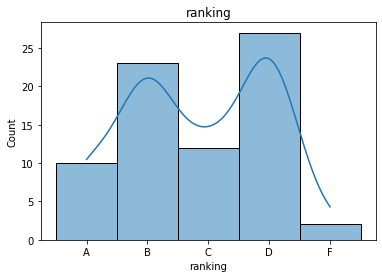

In [56]:
# now we get the histogram in order!

sns.histplot(data=sd ['ranking'], kde = True).set_title('ranking')
sd.ranking.value_counts()


<AxesSubplot:xlabel='cis', ylabel='Count'>

<AxesSubplot:xlabel='gender', ylabel='Count'>

<AxesSubplot:xlabel='status', ylabel='Count'>

<AxesSubplot:xlabel='ranking', ylabel='Count'>

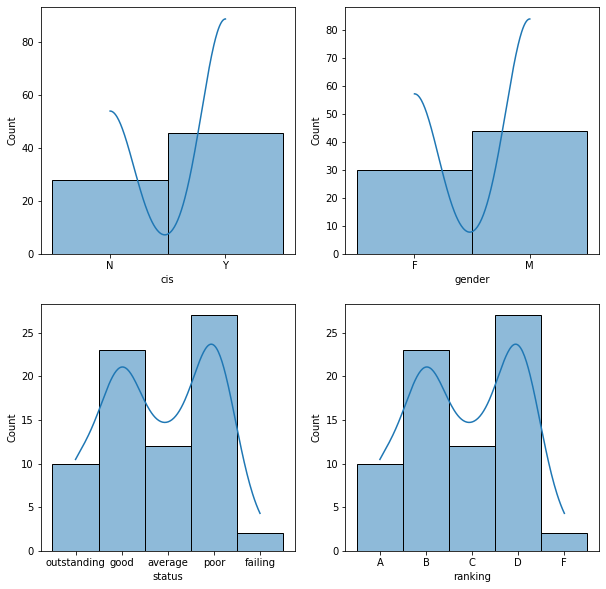

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots (2,2, figsize = (10, 10))

sns.histplot(data=sd.cis, kde=True, ax = axs[0,0])
sns.histplot(data=sd.gender, kde=True, ax = axs[0,1])
sns.histplot(data=sd, x='status', kde=True, ax = axs[1,0])
sns.histplot(data=sd, x='ranking', kde=True, ax = axs[1,1])


In [58]:
sd_cranking=pd.crosstab(sd['ranking'], sd['cis'], margins=True)
sd_cranking

sd_granking=pd.crosstab(sd['ranking'], sd['gender'], margins=True)
sd_granking


cis,N,Y,All
ranking,,,
A,0,10,10
B,6,17,23
C,7,5,12
D,13,14,27
F,2,0,2
All,28,46,74


gender,F,M,All
ranking,,,
A,3,7,10
B,12,11,23
C,3,9,12
D,12,15,27
F,0,2,2
All,30,44,74


# Chi-Square test for gender, ranking and cis, ranking 

# Testing cis and ranking

H0 = CIS and NON-CIS students are independent of their ranking(grades).

Ha = CIS and NON-CIS are NOT independent of their ranking(grades).

In [59]:
from scipy.stats import chi2_contingency 

stat, p, dof, expected = chi2_contingency(sd_cranking)

print('chi square is : %8.6f with %1dth degree of freedom and the p-value is %15.10f' % (stat,dof,p))


alpha = 0.05
print('p value is ' + str(p))
if p <= alpha:
    print('Dependent (Reject H0)')
else:
    print('Independent (H0 holds true)')
    


chi square is : 14.086310 with 10th degree of freedom and the p-value is    0.1690910158
p value is 0.16909101575019309
Independent (H0 holds true)


# Conclusion: 
Students major (CIS or NON-CIS) are independent from the ranking categorical variable. The p-value is more than alpha and there is 95% confidence that if they are CIS or NON-CIS major does not determine or affect their ranking. Meaning whether students are CIS and NON-CIS students, it does not affect their ranking. Hence, their grade.

## Chi Square test for gender and ranking

In [60]:
stat, p, dof, expected = chi2_contingency(sd_granking)

print('chi square is : %8.6f with %1dth degree of freedom and the p-value is %15.10f' % (stat,dof,p))


alpha = 0.05
print('p value is ' + str(p))
if p <= alpha:
    print('Dependent (Reject H0)')
else:
    print('Independent (H0 holds true)')
    

chi square is : 4.488830 with 10th degree of freedom and the p-value is    0.9226131564
p value is 0.9226131563869042
Independent (H0 holds true)


## Conclusion:
Students' gender are independent from their ranking. We cannot reject null hypothesis. The chi-square test p-value is higer than alpha. Telling us that students' gender does not affect their ranking. 

In [61]:
sd

,gender,cis,req,dfd,erd,wght,status,ranking
0,M,N,90.0,85.0,80.0,77.56,average,C
1,M,Y,90.0,100.0,90.0,81.85,good,B
2,M,Y,90.0,100.0,90.0,84.59,good,B
3,F,Y,90.0,50.0,85.0,81.30,good,B
6,F,N,90.0,80.0,80.0,78.43,average,C
...,...,...,...,...,...,...,...,...
87,M,Y,85.0,70.0,50.0,66.84,poor,D
89,F,Y,80.0,40.0,50.0,67.10,poor,D
90,M,Y,95.0,100.0,80.0,93.50,outstanding,A
92,F,N,95.0,40.0,80.0,71.74,poor,D


In [62]:
#correlation between assignments and the total performance

print(sd['req'].corr(sd['wght']))
print(sd['dfd'].corr(sd['wght']))
print(sd['erd'].corr(sd['wght']))

0.46193998449410456
0.49327224934924147
0.5461433842576453


# all show strong relationship with the total weight


# Linear Regression

## *If a student gets req=75, dfd=75, erd=90 on its assignments, what is the predicted weight total??* 

## This model explains 51% of the predicted weight of 82 to the student with these certain grades. 

In [68]:
import numpy as np
import statsmodels.api as sm

y=sd['wght']
x=sd[['req','dfd','erd']]
x=sm.add_constant(x)
model =sm.OLS(y,x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wght   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     24.51
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           5.94e-11
Time:                        11:08:06   Log-Likelihood:                -246.00
No. Observations:                  74   AIC:                             500.0
Df Residuals:                      70   BIC:                             509.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0211      5.823      5.843      0.0

In [73]:
req1 = 75
dfd1 = 75
erd1 = 90

peterW = 34.02 + 0.29*req1 + 0.11*dfd1 + 0.2*erd1 
print('The predicted weighted total for Peter is:', peterW)

The predicted weighted total for Peter is: 82.02000000000001


# Mary has gotten 90 in ERD, 80 in REQ, how many points does she need to get in her DFD assignment so that she may get a predictive weighted total above 93?

In [74]:
y = sd['dfd']
x = sd[['req','erd','wght']]
x = sm.add_constant(x)
modelm= sm.OLS (y,x)
resultsm=modelm.fit()
print(resultsm.summary())

                            OLS Regression Results                            
Dep. Variable:                    dfd   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     10.75
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           6.77e-06
Time:                        11:08:06   Log-Likelihood:                -331.02
No. Observations:                  74   AIC:                             670.0
Df Residuals:                      70   BIC:                             679.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.0899     22.322     -0.721      0.4

In [75]:
req2= 80
erd2= 90
wght2= 93

MaryD = -16.0899 - 0.2962*req2 + 0.3401*erd2 + 1.1138*wght2
print('The predicted weighted total for Mary is:', MaryD)

The predicted weighted total for Mary is: 94.4065


## Obersvation 8: Even though with the predicted total of 94 points, it is very unlikely she could get this points. In other words, this is NOT good fit for the Mary's grades. The predictive regression is not accurate and there is almost 32% explaning it. However, we are not counting the other scores that influence the weighted total, besides all three grades, other scores contributed to the total grade(not listed in this data set). She can't 94 points in total just by getting a higher grade in the dfd assignment alone. By looking at the constant, req, and erd is higher than alpha (0.05) this tells us it its not a good fit to predict her score. There is a significant evidence dfd is NOT a good fit to the predictive model.

# Anova Model - Analysis

# Anova Model - 1 (Ranking) 

# Hypothesis: The ranking for each student impact their total performance.

H0= u'A' = u'B' = u'C' = u'D' = u'F'


Ha = not all ranking means are the same

In [69]:
import numpy as np
from statsmodels.formula.api import ols

model = ols('wght ~ ranking', data=sd).fit()
table=sm.stats.anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
ranking,4.0,6295.458550,1573.864637,193.239579,1.076348e-36
Residual,69.0,561.979385,8.144629,NaN,NaN


# Explanation: P-value(PR>F) less than 0.05 we can confirm that there is a significance evidence the total performance(wght) vary by the rankings of each student. The null hypothesis should be rejected. Not all rankings reflect the same grade.

# Anova - 2 (Gender)

# Hypothesis: Gender impacts the total performance of grades

H0 : u'Male' = u'Female'


Ha : not all gender means are the same

In [70]:
import numpy as np
from statsmodels.formula.api import ols

model1 = ols('wght ~ gender', data=sd).fit()
table1=sm.stats.anova_lm(model1)
table1

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,19.597034,19.597034,0.20635,0.65101
Residual,72.0,6837.840901,94.970013,NaN,NaN


# The p-value is higher than alpha. Indicating that null hypothesis is true. The means of the two groups are almost the same. Meaning that there is NO significant evidence that weight is affected by the type of gender of student. Null hypothesis should not be rejected.

# Anova - 3 (cis)

# Hypothesis: 

H0: u'Y' = u'N'

Ha: not at the means are the equal

In [71]:
import numpy as np
from statsmodels.formula.api import ols

model2 = ols('wght ~ cis', data=sd).fit()
table2=sm.stats.anova_lm(model2)
table2

,df,sum_sq,mean_sq,F,PR(>F)
cis,1.0,853.833789,853.833789,10.239854,0.002045
Residual,72.0,6003.604147,83.383391,NaN,NaN


# Explanation: the p-value (0.002045) is smaller than alpha (0.05). This tells us to reject the null hypothesis. Not at all the means of students majoring in CIS are equal. There is significant evidence that vary by CIS and NON-CIS students.

## Classifier: lets see if we can predict if these grades result to NON-CIS or CIS student.

In [76]:
X = sd[['req','dfd','erd']]

y = sd.cis

In [77]:
X.shape
y.shape

(74, 3)

(74,)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=10)

In [98]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

# Lets predict one student

In [99]:
knn.predict([[60,90,87]])

array(['Y'], dtype=object)

# Now lets predict multiple students


In [100]:
newX= [[50,50,90],[90,78,56]]
knn.predict(newX)

array(['Y', 'Y'], dtype=object)

# Different k value, k=15

In [102]:
knn = KNeighborsClassifier(n_neighbors=15)

In [103]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

In [104]:
knn.predict([[85, 67, 70]])

array(['Y'], dtype=object)

In [111]:
newX= [[70, 50, 50], [87,60,55]]
knn.predict(newX)

array(['N', 'Y'], dtype=object)